In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')


In [9]:
# Clean column names
df.columns = df.columns.str.strip()


In [10]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [11]:
# Extract Year and Month for time series analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.strftime('%b')


In [12]:
# Set plot style
sns.set(style="whitegrid")


<ipython-input-13-c7ebdb7e2fe4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='Blues_d')


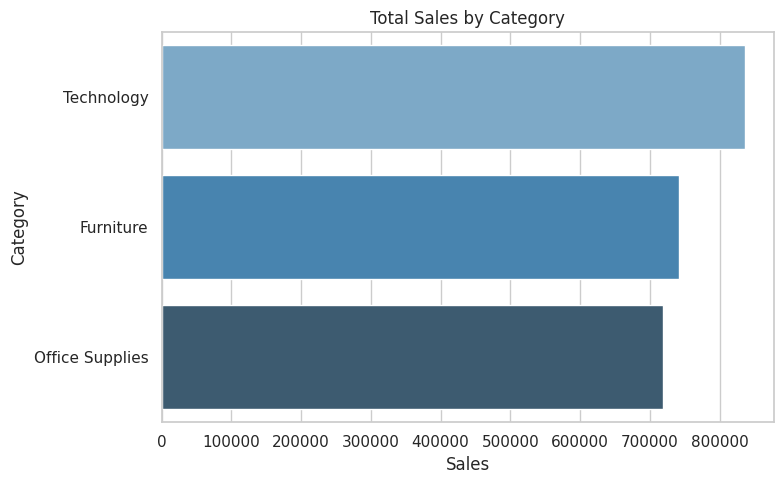

In [13]:
# 1. Total Sales by Category
plt.figure(figsize=(8,5))
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index, palette='Blues_d')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

<ipython-input-14-7ecd67ff5036>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_profit.values, y=subcat_profit.index, palette='coolwarm')


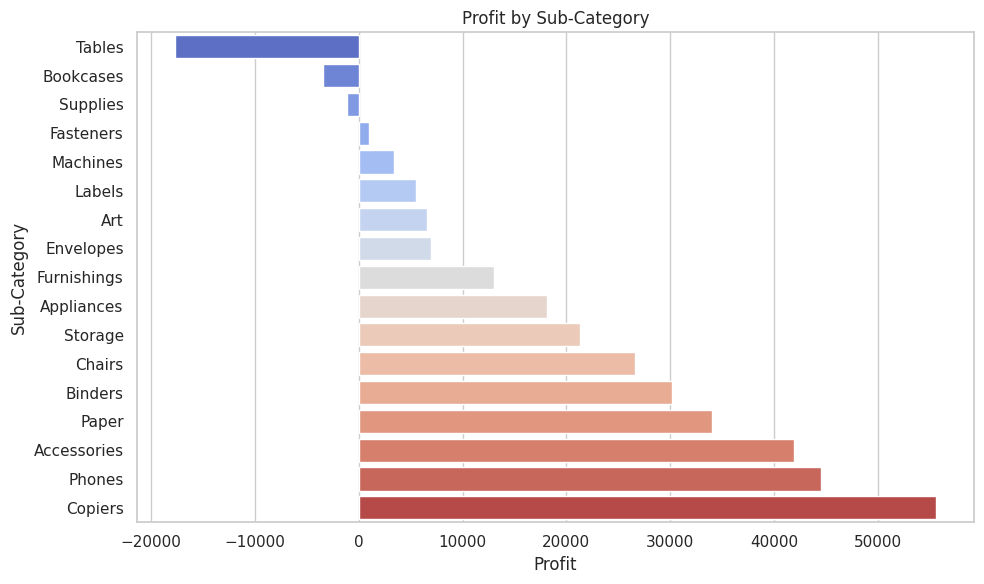

In [14]:

# 2. Profit by Sub-Category
plt.figure(figsize=(10,6))
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sns.barplot(x=subcat_profit.values, y=subcat_profit.index, palette='coolwarm')
plt.title('Profit by Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

In [15]:
# 3. Monthly Sales Trend
plt.figure(figsize=(12,6))
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

<Figure size 1200x600 with 0 Axes>

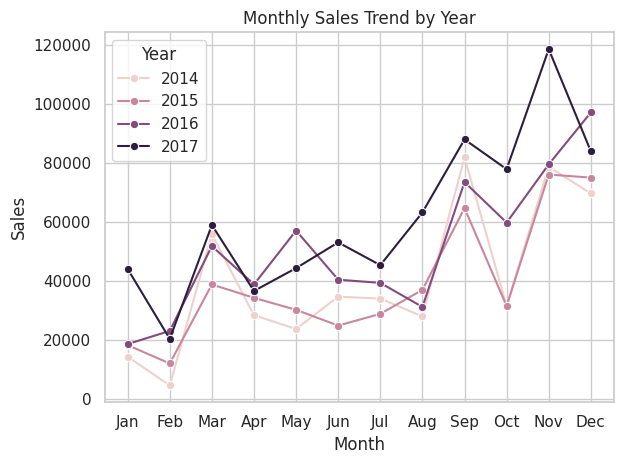

In [17]:
# Ensure correct month order
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


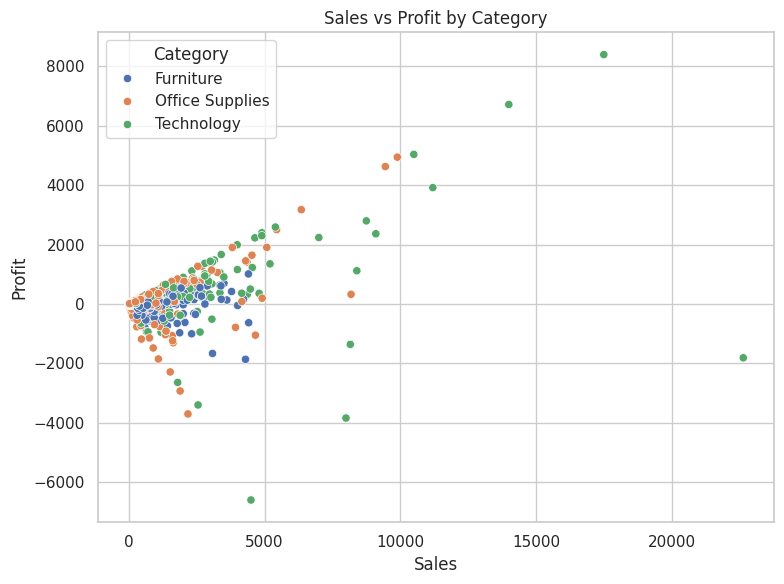

In [18]:
# 4. Sales vs Profit Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

<ipython-input-19-8660da6aeb70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='viridis')


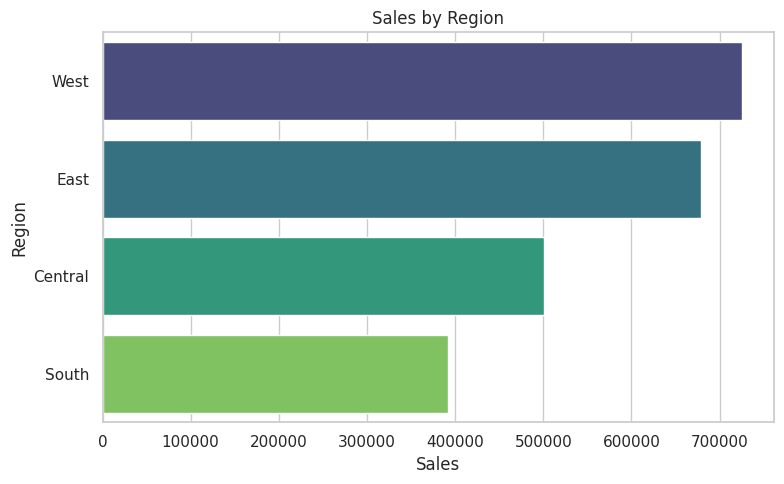

In [19]:

# 5. Region-wise Sales Distribution
plt.figure(figsize=(8,5))
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.values, y=region_sales.index, palette='viridis')
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.tight_layout()
plt.show()